<h1>ENB43 - RNNs</h1>
<h2>triple GRU + Dense </h2>

In [1]:
import tensorflow as tf
import keras
from keras import models
from keras import layers

import numpy as np
import os
import csv

import pickle
import time as tm

import matplotlib.pyplot as plt
import pre_process as pp

Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 186603043410399836]

<h2> Loading the datasets</h2>

In [3]:
with open('train_data.txt', 'rb') as fp:
    train_data = pickle.load(fp)
    
with open('train_labels.txt', 'rb') as fp:
    train_labels = pickle.load(fp)
    
with open('test_data.txt', 'rb') as fp:
    test_data = pickle.load(fp)
    
with open('test_labels.txt', 'rb') as fp:
    test_labels = pickle.load(fp)

<h2>k-fold params</h2>

In [4]:
k = 4
num_val_samples = len(train_data)
print(num_val_samples)
val_split_size = num_val_samples/k
val_split_size = int(val_split_size)
print(val_split_size)
type(val_split_size)

72
18


int

<h2>Experiment1: a single layer</h2>

In [5]:
net1 = models.Sequential()
net1.add(layers.GRU(360, return_sequences = True, input_shape = (480,6)))
net1.add(layers.GRU(360, return_sequences = True))
net1.add(layers.GRU(360))
net1.add(layers.Dense(360, activation = 'relu'))
net1.add(layers.Dense(7, activation = 'softmax'))
net1.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 480, 360)          396360    
_________________________________________________________________
gru_2 (GRU)                  (None, 480, 360)          778680    
_________________________________________________________________
gru_3 (GRU)                  (None, 360)               778680    
_________________________________________________________________
dense_1 (Dense)              (None, 360)               129960    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 2527      
Total params: 2,086,207
Trainable params: 2,086,207
Non-trainable params: 0
_________________________________________________________________


In [10]:
net1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net1.save_weights('net1.h5')  # each split will start with same weights so can directly compare results

In [11]:

histories1 = []
results_list1 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net1.load_weights('net1.h5')
    history = net1.fit(train_fold, train_tgt, epochs = 50, validation_data = (val_fold, val_tgt))

    histories1.append(history)
    
    
    results = net1.evaluate(test_data, test_labels)
    results_list1.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size
    
finish = tm.time()
duration1 = finish - start

0

Train on 54 samples, validate on 18 samples
Epoch 1/50
54/54 [==============================] - 14s 263ms/step - loss: 1.9368 - accuracy: 0.1111 - val_loss: 1.8640 - val_accuracy: 0.1111
Epoch 2/50
54/54 [==============================] - 14s 265ms/step - loss: 1.8858 - accuracy: 0.2407 - val_loss: 1.7891 - val_accuracy: 0.1111
Epoch 3/50
54/54 [==============================] - 15s 272ms/step - loss: 1.8403 - accuracy: 0.1852 - val_loss: 1.7294 - val_accuracy: 0.2222
Epoch 4/50
54/54 [==============================] - 15s 278ms/step - loss: 1.6522 - accuracy: 0.2778 - val_loss: 1.4621 - val_accuracy: 0.5000
Epoch 5/50
54/54 [==============================] - 15s 281ms/step - loss: 1.4474 - accuracy: 0.3519 - val_loss: 2.3770 - val_accuracy: 0.2778
Epoch 6/50
54/54 [==============================] - 15s 278ms/step - loss: 1.6683 - accuracy: 0.2222 - val_loss: 1.3213 - val_accuracy: 0.3889
Epoch 7/50
54/54 [==============================] - 15s 277ms/step - loss: 1.5327 - accuracy: 0

54/54 [==============================] - 19s 359ms/step - loss: 1.7924 - accuracy: 0.2037 - val_loss: 2.0893 - val_accuracy: 0.1111
Epoch 12/50
54/54 [==============================] - 19s 354ms/step - loss: 1.7789 - accuracy: 0.2037 - val_loss: 2.1094 - val_accuracy: 0.1111
Epoch 13/50
54/54 [==============================] - 19s 361ms/step - loss: 1.7615 - accuracy: 0.2222 - val_loss: 2.1140 - val_accuracy: 0.1667
Epoch 14/50
54/54 [==============================] - 20s 366ms/step - loss: 1.7509 - accuracy: 0.3519 - val_loss: 2.1095 - val_accuracy: 0.1667
Epoch 15/50
54/54 [==============================] - 20s 362ms/step - loss: 1.7282 - accuracy: 0.3889 - val_loss: 2.0975 - val_accuracy: 0.1667
Epoch 16/50
54/54 [==============================] - 20s 363ms/step - loss: 1.7043 - accuracy: 0.3519 - val_loss: 2.0702 - val_accuracy: 0.1667
Epoch 17/50
54/54 [==============================] - 19s 361ms/step - loss: 1.6719 - accuracy: 0.4074 - val_loss: 2.0157 - val_accuracy: 0.2778
Epoc

Epoch 17/50
54/54 [==============================] - 22s 402ms/step - loss: 1.7417 - accuracy: 0.3148 - val_loss: 1.9669 - val_accuracy: 0.1111
Epoch 18/50
54/54 [==============================] - 22s 404ms/step - loss: 1.7160 - accuracy: 0.4074 - val_loss: 1.9410 - val_accuracy: 0.1111
Epoch 19/50
54/54 [==============================] - 22s 406ms/step - loss: 1.6880 - accuracy: 0.4259 - val_loss: 1.9090 - val_accuracy: 0.2222
Epoch 20/50
54/54 [==============================] - 22s 406ms/step - loss: 1.6464 - accuracy: 0.4815 - val_loss: 1.8992 - val_accuracy: 0.1111
Epoch 21/50
54/54 [==============================] - 22s 403ms/step - loss: 1.5902 - accuracy: 0.4259 - val_loss: 1.8329 - val_accuracy: 0.2222
Epoch 22/50
54/54 [==============================] - 22s 403ms/step - loss: 1.5183 - accuracy: 0.5000 - val_loss: 1.7603 - val_accuracy: 0.2222
Epoch 23/50
54/54 [==============================] - 22s 402ms/step - loss: 1.4384 - accuracy: 0.5185 - val_loss: 1.7032 - val_accuracy:

In [12]:
avg = np.mean(results_list1, axis=0)
std_dev = np.std(results_list1, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration1))

Average loss and accuracy scores were:  [1.30773389 0.55000001]
Standard deviation for loss & accuracy:  [0.06948123 0.11902381]
Duration in seconds:  3797


In [13]:
#net1.save('enb39-1.h5')

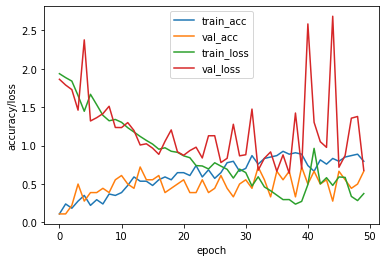

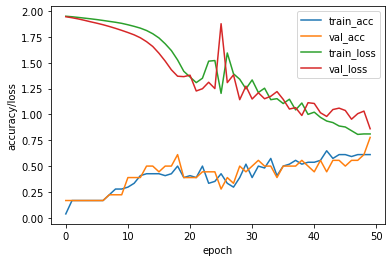

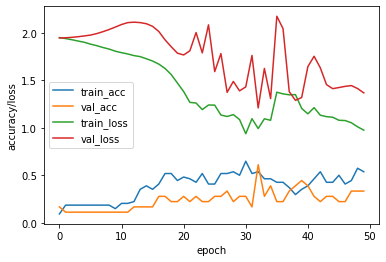

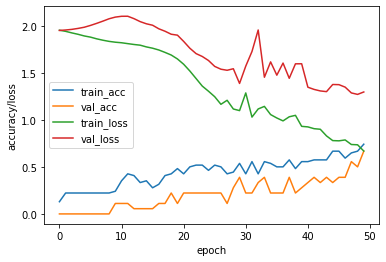

In [14]:
for history in histories1:
    pp.plot_hist(history)

<h2> Expriment2:</h2>

In [15]:
net2 = models.Sequential()
net2.add(layers.GRU(360, return_sequences = True, input_shape=(480,6)))
net2.add(layers.GRU(360, return_sequences = True))
net2.add(layers.GRU(360))
net2.add(layers.Dense(240,  activation = 'relu'))
net2.add(layers.Dense(7, activation = 'softmax'))
net2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_16 (GRU)                 (None, 480, 360)          396360    
_________________________________________________________________
gru_17 (GRU)                 (None, 480, 360)          778680    
_________________________________________________________________
gru_18 (GRU)                 (None, 360)               778680    
_________________________________________________________________
dense_9 (Dense)              (None, 240)               86640     
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 1687      
Total params: 2,042,047
Trainable params: 2,042,047
Non-trainable params: 0
_________________________________________________________________


In [16]:
net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

In [17]:
#net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

histories2 = []
results_list2 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net2.load_weights('net2.h5')
    history = net2.fit(train_fold, train_tgt, epochs = 50, validation_data = (val_fold, val_tgt))

    histories2.append(history)
    
    
    results = net2.evaluate(test_data, test_labels)
    results_list2.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration2 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/50
54/54 [==============================] - 22s 399ms/step - loss: 1.9614 - accuracy: 0.0926 - val_loss: 1.9183 - val_accuracy: 0.1111
Epoch 2/50
54/54 [==============================] - 20s 365ms/step - loss: 1.9226 - accuracy: 0.1296 - val_loss: 1.8505 - val_accuracy: 0.1111
Epoch 3/50
54/54 [==============================] - 20s 361ms/step - loss: 1.8835 - accuracy: 0.1481 - val_loss: 1.8098 - val_accuracy: 0.2222
Epoch 4/50
54/54 [==============================] - 19s 352ms/step - loss: 1.7996 - accuracy: 0.3333 - val_loss: 1.7081 - val_accuracy: 0.2222
Epoch 5/50
54/54 [==============================] - 19s 359ms/step - loss: 1.6289 - accuracy: 0.4074 - val_loss: 1.5681 - val_accuracy: 0.3333
Epoch 6/50
54/54 [==============================] - 19s 360ms/step - loss: 1.4021 - accuracy: 0.3704 - val_loss: 1.4535 - val_accuracy: 0.3333
Epoch 7/50
54/54 [==============================] - 20s 361ms/step - loss: 1.5687 - accuracy: 0.

Epoch 7/50
54/54 [==============================] - 22s 409ms/step - loss: 1.9061 - accuracy: 0.1667 - val_loss: 1.8682 - val_accuracy: 0.2222
Epoch 8/50
54/54 [==============================] - 22s 400ms/step - loss: 1.8983 - accuracy: 0.2778 - val_loss: 1.8554 - val_accuracy: 0.3889
Epoch 9/50
54/54 [==============================] - 22s 402ms/step - loss: 1.8880 - accuracy: 0.3333 - val_loss: 1.8378 - val_accuracy: 0.3889
Epoch 10/50
54/54 [==============================] - 22s 400ms/step - loss: 1.8768 - accuracy: 0.3519 - val_loss: 1.8176 - val_accuracy: 0.3889
Epoch 11/50
54/54 [==============================] - 22s 403ms/step - loss: 1.8702 - accuracy: 0.3519 - val_loss: 1.7978 - val_accuracy: 0.3889
Epoch 12/50
54/54 [==============================] - 22s 404ms/step - loss: 1.8556 - accuracy: 0.3333 - val_loss: 1.7828 - val_accuracy: 0.3889
Epoch 13/50
54/54 [==============================] - 22s 405ms/step - loss: 1.8395 - accuracy: 0.3333 - val_loss: 1.7654 - val_accuracy: 0.

Epoch 13/50
54/54 [==============================] - 23s 426ms/step - loss: 1.7886 - accuracy: 0.2037 - val_loss: 2.1907 - val_accuracy: 0.1111
Epoch 14/50
54/54 [==============================] - 23s 425ms/step - loss: 1.7737 - accuracy: 0.2037 - val_loss: 2.1814 - val_accuracy: 0.1111
Epoch 15/50
54/54 [==============================] - 23s 431ms/step - loss: 1.7585 - accuracy: 0.2037 - val_loss: 2.1536 - val_accuracy: 0.1111
Epoch 16/50
54/54 [==============================] - 23s 428ms/step - loss: 1.7452 - accuracy: 0.2037 - val_loss: 2.1196 - val_accuracy: 0.0556
Epoch 17/50
54/54 [==============================] - 23s 425ms/step - loss: 1.7328 - accuracy: 0.2222 - val_loss: 2.0775 - val_accuracy: 0.1667
Epoch 18/50
54/54 [==============================] - 23s 427ms/step - loss: 1.7145 - accuracy: 0.2593 - val_loss: 2.0317 - val_accuracy: 0.1667
Epoch 19/50
54/54 [==============================] - 23s 427ms/step - loss: 1.6950 - accuracy: 0.4444 - val_loss: 1.9889 - val_accuracy:

Epoch 19/50
54/54 [==============================] - 24s 436ms/step - loss: 1.5524 - accuracy: 0.4074 - val_loss: 1.7003 - val_accuracy: 0.1111
Epoch 20/50
54/54 [==============================] - 24s 436ms/step - loss: 1.4558 - accuracy: 0.4074 - val_loss: 1.6114 - val_accuracy: 0.1111
Epoch 21/50
54/54 [==============================] - 24s 440ms/step - loss: 1.3332 - accuracy: 0.4074 - val_loss: 1.5226 - val_accuracy: 0.1111
Epoch 22/50
54/54 [==============================] - 24s 439ms/step - loss: 1.2218 - accuracy: 0.5000 - val_loss: 1.5306 - val_accuracy: 0.3333
Epoch 23/50
54/54 [==============================] - 24s 438ms/step - loss: 1.1486 - accuracy: 0.5556 - val_loss: 1.6314 - val_accuracy: 0.2778
Epoch 24/50
54/54 [==============================] - 23s 434ms/step - loss: 1.1111 - accuracy: 0.5370 - val_loss: 1.6074 - val_accuracy: 0.2778
Epoch 25/50
54/54 [==============================] - 24s 436ms/step - loss: 1.0827 - accuracy: 0.4444 - val_loss: 1.7013 - val_accuracy:

In [18]:
avg = np.mean(results_list2, axis=0)
std_dev = np.std(results_list2, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration2))

Average loss and accuracy scores were:  [1.41965795 0.65000002]
Standard deviation for loss & accuracy:  [0.08629436 0.05527708]
Duration in seconds:  4464


In [19]:
#net2.save('enb38-2.h5')

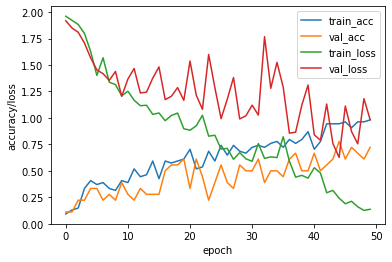

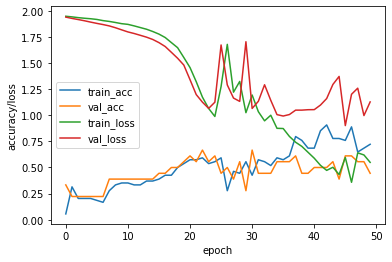

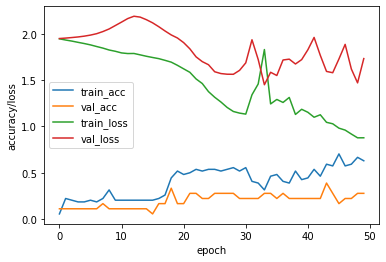

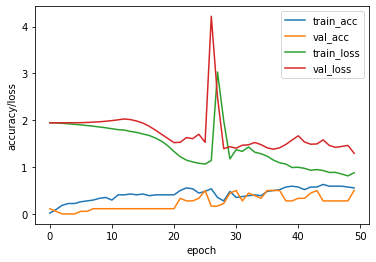

In [20]:
for history in histories2:
    pp.plot_hist(history)

<h2> Expriment3:</h2>

In [21]:
net3 = models.Sequential()
net3.add(layers.GRU(240, return_sequences = True, input_shape=(480,6)))
net3.add(layers.GRU(240, return_sequences = True))
net3.add(layers.GRU(240))
net3.add(layers.Dense(240,  activation = 'relu'))
net3.add(layers.Dense(7, activation = 'softmax'))
net3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_19 (GRU)                 (None, 480, 240)          177840    
_________________________________________________________________
gru_20 (GRU)                 (None, 480, 240)          346320    
_________________________________________________________________
gru_21 (GRU)                 (None, 240)               346320    
_________________________________________________________________
dense_11 (Dense)             (None, 240)               57840     
_________________________________________________________________
dense_12 (Dense)             (None, 7)                 1687      
Total params: 930,007
Trainable params: 930,007
Non-trainable params: 0
_________________________________________________________________


In [22]:
net3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net3.save_weights('net3.h5')  # each split will start with same weights so can directly compare results

histories3 = []
results_list3 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net3.load_weights('net3.h5')
    history = net3.fit(train_fold, train_tgt, epochs = 50, validation_data = (val_fold, val_tgt))

    histories3.append(history)
    
    
    results = net3.evaluate(test_data, test_labels)
    results_list3.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration3 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/100
54/54 [==============================] - 15s 273ms/step - loss: 1.9482 - accuracy: 0.1111 - val_loss: 1.9008 - val_accuracy: 0.1667
Epoch 2/100
54/54 [==============================] - 14s 257ms/step - loss: 1.9142 - accuracy: 0.1852 - val_loss: 1.8639 - val_accuracy: 0.1111
Epoch 3/100
54/54 [==============================] - 14s 255ms/step - loss: 1.8730 - accuracy: 0.2222 - val_loss: 1.7943 - val_accuracy: 0.1111
Epoch 4/100
54/54 [==============================] - 14s 255ms/step - loss: 1.8238 - accuracy: 0.2037 - val_loss: 1.7324 - val_accuracy: 0.2222
Epoch 5/100
54/54 [==============================] - 14s 256ms/step - loss: 1.7057 - accuracy: 0.3519 - val_loss: 1.6053 - val_accuracy: 0.3333
Epoch 6/100
54/54 [==============================] - 14s 254ms/step - loss: 1.4893 - accuracy: 0.4259 - val_loss: 1.4472 - val_accuracy: 0.3333
Epoch 7/100
54/54 [==============================] - 14s 253ms/step - loss: 1.4477 - accur

Epoch 13/100
54/54 [==============================] - 14s 259ms/step - loss: 1.8970 - accuracy: 0.3333 - val_loss: 1.8578 - val_accuracy: 0.3889
Epoch 14/100
54/54 [==============================] - 14s 260ms/step - loss: 1.8918 - accuracy: 0.3519 - val_loss: 1.8507 - val_accuracy: 0.3889
Epoch 15/100
54/54 [==============================] - 14s 259ms/step - loss: 1.8863 - accuracy: 0.3333 - val_loss: 1.8442 - val_accuracy: 0.3889
Epoch 16/100
54/54 [==============================] - 14s 259ms/step - loss: 1.8823 - accuracy: 0.3519 - val_loss: 1.8350 - val_accuracy: 0.3889
Epoch 17/100
54/54 [==============================] - 14s 259ms/step - loss: 1.8765 - accuracy: 0.3519 - val_loss: 1.8258 - val_accuracy: 0.3889
Epoch 18/100
54/54 [==============================] - 14s 260ms/step - loss: 1.8709 - accuracy: 0.3519 - val_loss: 1.8172 - val_accuracy: 0.3889
Epoch 19/100
54/54 [==============================] - 14s 261ms/step - loss: 1.8657 - accuracy: 0.3519 - val_loss: 1.8054 - val_ac

Epoch 25/100
54/54 [==============================] - 14s 260ms/step - loss: 1.6282 - accuracy: 0.5000 - val_loss: 1.9032 - val_accuracy: 0.2222
Epoch 26/100
54/54 [==============================] - 14s 261ms/step - loss: 1.5818 - accuracy: 0.4630 - val_loss: 1.8500 - val_accuracy: 0.1667
Epoch 27/100
54/54 [==============================] - 14s 261ms/step - loss: 1.5382 - accuracy: 0.4444 - val_loss: 1.7752 - val_accuracy: 0.2222
Epoch 28/100
54/54 [==============================] - 14s 259ms/step - loss: 1.4861 - accuracy: 0.4815 - val_loss: 1.7027 - val_accuracy: 0.2222
Epoch 29/100
54/54 [==============================] - 14s 258ms/step - loss: 1.4409 - accuracy: 0.4630 - val_loss: 1.6448 - val_accuracy: 0.2222
Epoch 30/100
54/54 [==============================] - 14s 260ms/step - loss: 1.3934 - accuracy: 0.5370 - val_loss: 1.5971 - val_accuracy: 0.2778
Epoch 31/100
54/54 [==============================] - 14s 261ms/step - loss: 1.3487 - accuracy: 0.5370 - val_loss: 1.5778 - val_ac

54/54 [==============================] - 14s 261ms/step - loss: 1.5819 - accuracy: 0.4074 - val_loss: 1.8189 - val_accuracy: 0.1111
Epoch 37/100
54/54 [==============================] - 14s 260ms/step - loss: 1.5384 - accuracy: 0.4074 - val_loss: 1.7819 - val_accuracy: 0.1111
Epoch 38/100
54/54 [==============================] - 14s 259ms/step - loss: 1.4895 - accuracy: 0.4074 - val_loss: 1.7455 - val_accuracy: 0.1111
Epoch 39/100
54/54 [==============================] - 14s 261ms/step - loss: 1.4346 - accuracy: 0.4815 - val_loss: 1.7020 - val_accuracy: 0.1111
Epoch 40/100
54/54 [==============================] - 14s 262ms/step - loss: 1.3747 - accuracy: 0.4444 - val_loss: 1.6719 - val_accuracy: 0.2778
Epoch 41/100
54/54 [==============================] - 14s 261ms/step - loss: 1.3259 - accuracy: 0.5000 - val_loss: 1.6435 - val_accuracy: 0.2778
Epoch 42/100
54/54 [==============================] - 14s 260ms/step - loss: 1.2684 - accuracy: 0.5185 - val_loss: 1.5870 - val_accuracy: 0.277

In [23]:
avg = np.mean(results_list3, axis=0)
std_dev = np.std(results_list3, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration3))

Average loss and accuracy scores were:  [1.41773871 0.66666669]
Standard deviation for loss & accuracy:  [0.21962363 0.04714045]
Duration in seconds:  5596


In [24]:
#net3.save('enb38-3.h5')

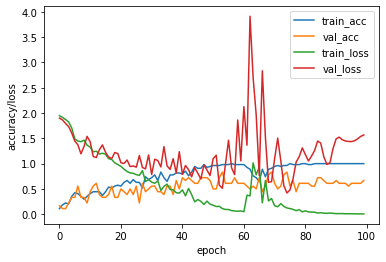

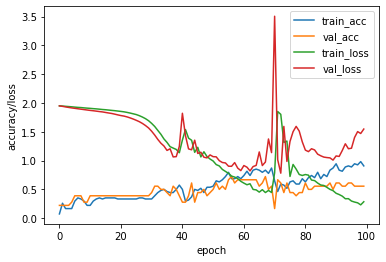

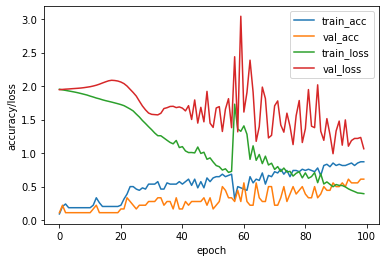

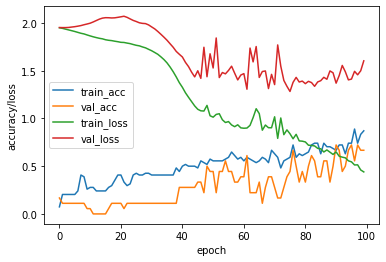

In [25]:
for history in histories3:
    pp.plot_hist(history)

<h2> Expriment4:</h2>

In [26]:
net4 = models.Sequential()
net4.add(layers.GRU(240, return_sequences = True, input_shape=(480,6)))
net4.add(layers.GRU(240, return_sequences = True))
net4.add(layers.GRU(240))
net4.add(layers.Dense(120,  activation = 'relu'))
net4.add(layers.Dense(7, activation = 'softmax'))
net4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_22 (GRU)                 (None, 480, 240)          177840    
_________________________________________________________________
gru_23 (GRU)                 (None, 480, 240)          346320    
_________________________________________________________________
gru_24 (GRU)                 (None, 240)               346320    
_________________________________________________________________
dense_13 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 847       
Total params: 900,247
Trainable params: 900,247
Non-trainable params: 0
_________________________________________________________________


In [27]:
net4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net4.save_weights('net4.h5')  # each split will start with same weights so can directly compare results

histories4 = []
results_list4 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net4.load_weights('net4.h5')
    history = net4.fit(train_fold, train_tgt, epochs = 50, validation_data = (val_fold, val_tgt))

    histories4.append(history)
    
    
    results = net4.evaluate(test_data, test_labels)
    results_list4.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration4 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/100
54/54 [==============================] - 14s 258ms/step - loss: 1.9457 - accuracy: 0.1296 - val_loss: 1.8756 - val_accuracy: 0.2778
Epoch 2/100
54/54 [==============================] - 13s 238ms/step - loss: 1.9096 - accuracy: 0.2222 - val_loss: 1.8356 - val_accuracy: 0.1111
Epoch 3/100
54/54 [==============================] - 13s 234ms/step - loss: 1.8598 - accuracy: 0.1852 - val_loss: 1.7970 - val_accuracy: 0.1111
Epoch 4/100
54/54 [==============================] - 13s 233ms/step - loss: 1.8170 - accuracy: 0.1852 - val_loss: 1.7709 - val_accuracy: 0.2222
Epoch 5/100
54/54 [==============================] - 12s 230ms/step - loss: 1.7272 - accuracy: 0.2963 - val_loss: 1.6692 - val_accuracy: 0.4444
Epoch 6/100
54/54 [==============================] - 13s 233ms/step - loss: 1.5576 - accuracy: 0.3333 - val_loss: 1.4748 - val_accuracy: 0.3333
Epoch 7/100
54/54 [==============================] - 13s 232ms/step - loss: 1.4026 - accur

Epoch 13/100
54/54 [==============================] - 13s 235ms/step - loss: 1.8756 - accuracy: 0.2963 - val_loss: 1.7954 - val_accuracy: 0.3889
Epoch 14/100
54/54 [==============================] - 13s 236ms/step - loss: 1.8701 - accuracy: 0.3333 - val_loss: 1.7867 - val_accuracy: 0.3889
Epoch 15/100
54/54 [==============================] - 13s 238ms/step - loss: 1.8613 - accuracy: 0.3519 - val_loss: 1.7785 - val_accuracy: 0.3889
Epoch 16/100
54/54 [==============================] - 13s 236ms/step - loss: 1.8525 - accuracy: 0.3519 - val_loss: 1.7671 - val_accuracy: 0.3889
Epoch 17/100
54/54 [==============================] - 13s 236ms/step - loss: 1.8437 - accuracy: 0.3519 - val_loss: 1.7552 - val_accuracy: 0.3889
Epoch 18/100
54/54 [==============================] - 13s 238ms/step - loss: 1.8320 - accuracy: 0.3519 - val_loss: 1.7474 - val_accuracy: 0.3889
Epoch 19/100
54/54 [==============================] - 13s 237ms/step - loss: 1.8180 - accuracy: 0.3333 - val_loss: 1.7344 - val_ac

Epoch 25/100
54/54 [==============================] - 13s 235ms/step - loss: 1.7088 - accuracy: 0.2778 - val_loss: 1.9826 - val_accuracy: 0.2222
Epoch 26/100
54/54 [==============================] - 13s 237ms/step - loss: 1.6946 - accuracy: 0.3519 - val_loss: 1.9661 - val_accuracy: 0.2222
Epoch 27/100
54/54 [==============================] - 13s 238ms/step - loss: 1.6786 - accuracy: 0.4259 - val_loss: 1.9443 - val_accuracy: 0.2222
Epoch 28/100
54/54 [==============================] - 13s 235ms/step - loss: 1.6638 - accuracy: 0.4815 - val_loss: 1.9143 - val_accuracy: 0.2222
Epoch 29/100
54/54 [==============================] - 13s 237ms/step - loss: 1.6358 - accuracy: 0.5370 - val_loss: 1.8719 - val_accuracy: 0.2778
Epoch 30/100
54/54 [==============================] - 13s 235ms/step - loss: 1.6119 - accuracy: 0.5556 - val_loss: 1.8328 - val_accuracy: 0.2778
Epoch 31/100
54/54 [==============================] - 13s 236ms/step - loss: 1.5859 - accuracy: 0.5000 - val_loss: 1.7933 - val_ac

Epoch 37/100
54/54 [==============================] - 13s 235ms/step - loss: 1.1725 - accuracy: 0.5556 - val_loss: 1.6218 - val_accuracy: 0.2778
Epoch 38/100
54/54 [==============================] - 13s 235ms/step - loss: 1.1633 - accuracy: 0.5000 - val_loss: 1.5962 - val_accuracy: 0.2778
Epoch 39/100
54/54 [==============================] - 13s 234ms/step - loss: 1.0911 - accuracy: 0.5370 - val_loss: 1.5654 - val_accuracy: 0.2778
Epoch 40/100
54/54 [==============================] - 13s 236ms/step - loss: 1.1374 - accuracy: 0.5185 - val_loss: 1.5285 - val_accuracy: 0.3333
Epoch 41/100
54/54 [==============================] - 13s 236ms/step - loss: 1.2829 - accuracy: 0.4444 - val_loss: 1.5323 - val_accuracy: 0.2778
Epoch 42/100
54/54 [==============================] - 13s 235ms/step - loss: 1.0524 - accuracy: 0.5741 - val_loss: 1.5648 - val_accuracy: 0.2778
Epoch 43/100
54/54 [==============================] - 13s 235ms/step - loss: 1.2788 - accuracy: 0.5185 - val_loss: 1.6227 - val_ac

In [28]:
avg = np.mean(results_list4, axis=0)
std_dev = np.std(results_list4, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration4))

Average loss and accuracy scores were:  [1.20500882 0.76666668]
Standard deviation for loss & accuracy:  [0.15523006 0.03333333]
Duration in seconds:  5095


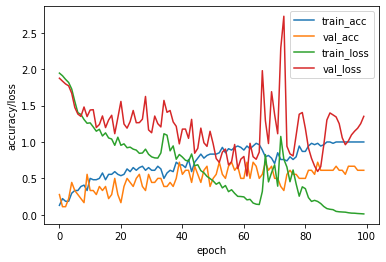

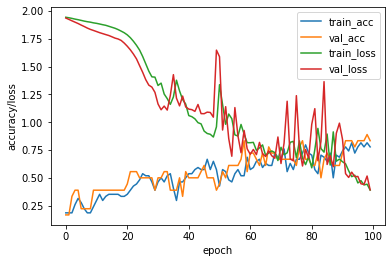

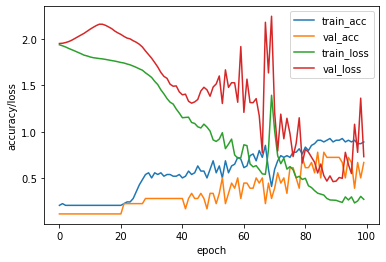

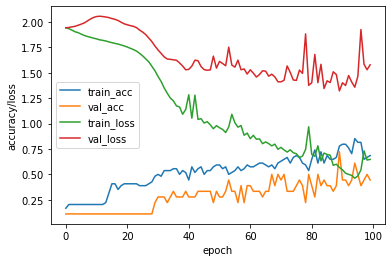

In [29]:
for history in histories4:
    pp.plot_hist(history)

In [14]:
#net4.save('enb38-4.h5')

<h2> Expriment5:</h2>

In [5]:
net5 = models.Sequential()
net5.add(layers.GRU((360), return_sequences = True, input_shape = (480,6)))
net5.add(layers.GRU(240))
net5.add(layers.Dense(7, activation = 'softmax'))
net5.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 480, 360)          396360    
_________________________________________________________________
gru_2 (GRU)                  (None, 240)               432720    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 1687      
Total params: 830,767
Trainable params: 830,767
Non-trainable params: 0
_________________________________________________________________


In [6]:
net5.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net5.save_weights('net5.h5')  # each split will start with same weights so can directly compare results

histories5 = []
results_list5 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net5.load_weights('net5.h5')
    history = net5.fit(train_fold, train_tgt, epochs = 100, validation_data = (val_fold, val_tgt))

    histories5.append(history)
    
    
    results = net5.evaluate(test_data, test_labels)
    results_list5.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration5 = finish - start

0

Train on 54 samples, validate on 18 samples
Epoch 1/100
54/54 [==============================] - 5s 98ms/step - loss: 1.9392 - accuracy: 0.1481 - val_loss: 1.8711 - val_accuracy: 0.1111
Epoch 2/100
54/54 [==============================] - 5s 91ms/step - loss: 1.8873 - accuracy: 0.1852 - val_loss: 1.8291 - val_accuracy: 0.1111
Epoch 3/100
54/54 [==============================] - 5s 99ms/step - loss: 1.8627 - accuracy: 0.1852 - val_loss: 1.7898 - val_accuracy: 0.1111
Epoch 4/100
54/54 [==============================] - 5s 91ms/step - loss: 1.8143 - accuracy: 0.1852 - val_loss: 1.7486 - val_accuracy: 0.3333
Epoch 5/100
54/54 [==============================] - 5s 93ms/step - loss: 1.7523 - accuracy: 0.3519 - val_loss: 1.6822 - val_accuracy: 0.3889
Epoch 6/100
54/54 [==============================] - 5s 93ms/step - loss: 1.6240 - accuracy: 0.3333 - val_loss: 1.4924 - val_accuracy: 0.3333
Epoch 7/100
54/54 [==============================] - 5s 93ms/step - loss: 1.4562 - accuracy: 0.3333 -

54/54 [==============================] - 5s 98ms/step - loss: 0.7687 - accuracy: 0.6481 - val_loss: 0.9675 - val_accuracy: 0.3889
Epoch 57/100
54/54 [==============================] - 5s 99ms/step - loss: 0.7765 - accuracy: 0.6296 - val_loss: 0.8393 - val_accuracy: 0.4444
Epoch 58/100
54/54 [==============================] - 5s 99ms/step - loss: 0.5885 - accuracy: 0.7593 - val_loss: 0.8038 - val_accuracy: 0.6111
Epoch 59/100
54/54 [==============================] - 5s 97ms/step - loss: 0.5263 - accuracy: 0.7963 - val_loss: 0.8835 - val_accuracy: 0.3333
Epoch 60/100
54/54 [==============================] - 5s 99ms/step - loss: 0.5327 - accuracy: 0.7407 - val_loss: 0.8898 - val_accuracy: 0.3333
Epoch 61/100
54/54 [==============================] - 5s 98ms/step - loss: 0.6257 - accuracy: 0.6852 - val_loss: 0.8186 - val_accuracy: 0.5556
Epoch 62/100
54/54 [==============================] - 5s 99ms/step - loss: 0.5943 - accuracy: 0.7778 - val_loss: 0.7416 - val_accuracy: 0.5000
Epoch 63/100

54/54 [==============================] - 5s 98ms/step - loss: 1.8629 - accuracy: 0.2407 - val_loss: 1.8001 - val_accuracy: 0.3889
Epoch 13/100
54/54 [==============================] - 5s 98ms/step - loss: 1.8558 - accuracy: 0.2963 - val_loss: 1.7885 - val_accuracy: 0.3889
Epoch 14/100
54/54 [==============================] - 5s 99ms/step - loss: 1.8513 - accuracy: 0.3333 - val_loss: 1.7749 - val_accuracy: 0.3889
Epoch 15/100
54/54 [==============================] - 5s 98ms/step - loss: 1.8409 - accuracy: 0.3519 - val_loss: 1.7674 - val_accuracy: 0.3889
Epoch 16/100
54/54 [==============================] - 5s 100ms/step - loss: 1.8341 - accuracy: 0.3519 - val_loss: 1.7581 - val_accuracy: 0.3889
Epoch 17/100
54/54 [==============================] - 5s 99ms/step - loss: 1.8270 - accuracy: 0.3704 - val_loss: 1.7488 - val_accuracy: 0.3889
Epoch 18/100
54/54 [==============================] - 5s 98ms/step - loss: 1.8196 - accuracy: 0.3889 - val_loss: 1.7398 - val_accuracy: 0.3889
Epoch 19/10

54/54 [==============================] - 5s 98ms/step - loss: 0.8707 - accuracy: 0.7037 - val_loss: 0.8249 - val_accuracy: 0.5556
Epoch 70/100
54/54 [==============================] - 5s 99ms/step - loss: 0.8221 - accuracy: 0.5741 - val_loss: 0.9306 - val_accuracy: 0.5000
Epoch 71/100
54/54 [==============================] - 5s 100ms/step - loss: 0.8062 - accuracy: 0.6111 - val_loss: 1.6046 - val_accuracy: 0.3889
Epoch 72/100
54/54 [==============================] - 5s 99ms/step - loss: 1.7711 - accuracy: 0.5000 - val_loss: 1.0095 - val_accuracy: 0.4444
Epoch 73/100
54/54 [==============================] - 5s 98ms/step - loss: 0.8587 - accuracy: 0.5556 - val_loss: 0.8771 - val_accuracy: 0.5556
Epoch 74/100
54/54 [==============================] - 5s 101ms/step - loss: 0.8421 - accuracy: 0.5741 - val_loss: 1.0021 - val_accuracy: 0.5000
Epoch 75/100
54/54 [==============================] - 5s 99ms/step - loss: 0.9166 - accuracy: 0.5556 - val_loss: 0.8890 - val_accuracy: 0.5000
Epoch 76/1

54/54 [==============================] - 5s 100ms/step - loss: 1.6445 - accuracy: 0.4815 - val_loss: 1.9824 - val_accuracy: 0.2778
Epoch 26/100
54/54 [==============================] - 5s 98ms/step - loss: 1.6268 - accuracy: 0.5000 - val_loss: 1.9623 - val_accuracy: 0.2778
Epoch 27/100
54/54 [==============================] - 5s 99ms/step - loss: 1.6067 - accuracy: 0.5370 - val_loss: 1.9441 - val_accuracy: 0.2778
Epoch 28/100
54/54 [==============================] - 5s 101ms/step - loss: 1.5817 - accuracy: 0.5370 - val_loss: 1.9254 - val_accuracy: 0.2778
Epoch 29/100
54/54 [==============================] - 5s 100ms/step - loss: 1.5531 - accuracy: 0.5370 - val_loss: 1.9102 - val_accuracy: 0.2778
Epoch 30/100
54/54 [==============================] - 5s 101ms/step - loss: 1.5203 - accuracy: 0.5370 - val_loss: 1.8968 - val_accuracy: 0.2778
Epoch 31/100
54/54 [==============================] - 5s 99ms/step - loss: 1.4784 - accuracy: 0.5185 - val_loss: 1.8812 - val_accuracy: 0.2778
Epoch 32

54/54 [==============================] - 5s 101ms/step - loss: 0.5902 - accuracy: 0.7778 - val_loss: 1.1527 - val_accuracy: 0.4444
Epoch 83/100
54/54 [==============================] - 5s 101ms/step - loss: 0.6152 - accuracy: 0.7778 - val_loss: 1.0108 - val_accuracy: 0.5556
Epoch 84/100
54/54 [==============================] - 6s 103ms/step - loss: 0.6083 - accuracy: 0.7778 - val_loss: 0.9207 - val_accuracy: 0.6111
Epoch 85/100
54/54 [==============================] - 6s 103ms/step - loss: 0.6867 - accuracy: 0.7407 - val_loss: 1.2887 - val_accuracy: 0.3889
Epoch 86/100
54/54 [==============================] - 6s 106ms/step - loss: 0.7470 - accuracy: 0.7037 - val_loss: 4.1175 - val_accuracy: 0.1667
Epoch 87/100
54/54 [==============================] - 6s 103ms/step - loss: 5.6096 - accuracy: 0.2778 - val_loss: 6.9882 - val_accuracy: 0.1111
Epoch 88/100
54/54 [==============================] - 5s 100ms/step - loss: 5.2610 - accuracy: 0.1481 - val_loss: 5.2757 - val_accuracy: 0.1111
Epoch

54/54 [==============================] - 6s 103ms/step - loss: 1.2167 - accuracy: 0.5370 - val_loss: 1.5480 - val_accuracy: 0.4444
Epoch 39/100
54/54 [==============================] - 5s 101ms/step - loss: 1.1750 - accuracy: 0.5556 - val_loss: 1.6301 - val_accuracy: 0.5000
Epoch 40/100
54/54 [==============================] - 6s 103ms/step - loss: 1.1679 - accuracy: 0.6296 - val_loss: 1.6709 - val_accuracy: 0.5000
Epoch 41/100
54/54 [==============================] - 6s 102ms/step - loss: 1.1581 - accuracy: 0.6296 - val_loss: 1.6869 - val_accuracy: 0.3889
Epoch 42/100
54/54 [==============================] - 5s 100ms/step - loss: 1.1438 - accuracy: 0.6111 - val_loss: 1.5866 - val_accuracy: 0.3889
Epoch 43/100
54/54 [==============================] - 5s 101ms/step - loss: 1.1226 - accuracy: 0.5556 - val_loss: 1.4365 - val_accuracy: 0.2778
Epoch 44/100
54/54 [==============================] - 5s 102ms/step - loss: 1.1535 - accuracy: 0.5370 - val_loss: 1.4099 - val_accuracy: 0.2222
Epoch

Epoch 95/100
54/54 [==============================] - 6s 102ms/step - loss: 0.5006 - accuracy: 0.8148 - val_loss: 1.2907 - val_accuracy: 0.5556
Epoch 96/100
54/54 [==============================] - 6s 104ms/step - loss: 0.5442 - accuracy: 0.7778 - val_loss: 0.9233 - val_accuracy: 0.6111
Epoch 97/100
54/54 [==============================] - 6s 102ms/step - loss: 0.5522 - accuracy: 0.7963 - val_loss: 1.0825 - val_accuracy: 0.6667
Epoch 98/100
54/54 [==============================] - 5s 102ms/step - loss: 0.4606 - accuracy: 0.8519 - val_loss: 1.3021 - val_accuracy: 0.5556
Epoch 99/100
54/54 [==============================] - 6s 102ms/step - loss: 0.4476 - accuracy: 0.7963 - val_loss: 0.9962 - val_accuracy: 0.6667
Epoch 100/100
15/15 [==============================] - 0s 24ms/step
[1.0835952758789062, 0.800000011920929]


In [7]:
avg = np.mean(results_list5, axis=0)
std_dev = np.std(results_list5, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration5))

Average loss and accuracy scores were:  [1.3815946  0.60000002]
Standard deviation for loss & accuracy:  [0.2303525 0.2      ]
Duration in seconds:  2159


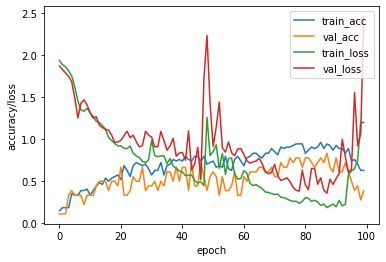

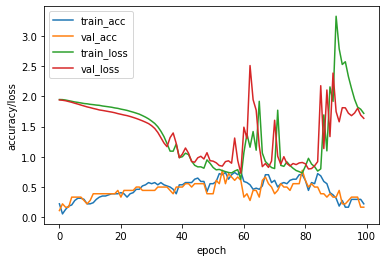

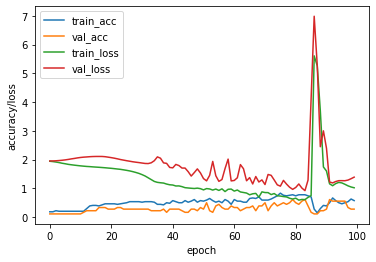

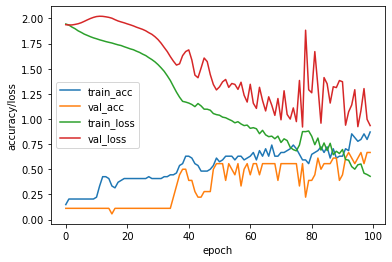

In [8]:
for history in histories5:
    pp.plot_hist(history)

<h2> Expriment6:</h2>

In [9]:
net6 = models.Sequential()
net6.add(layers.GRU((240), return_sequences = True, input_shape = (480,6)))
net6.add(layers.GRU(120))
net6.add(layers.Dense(7, activation = 'softmax'))
net6.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 480, 240)          177840    
_________________________________________________________________
gru_4 (GRU)                  (None, 120)               129960    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 847       
Total params: 308,647
Trainable params: 308,647
Non-trainable params: 0
_________________________________________________________________


In [10]:
net6.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net6.save_weights('net6.h5')  # each split will start with same weights so can directly compare results

histories6 = []
results_list6 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net6.load_weights('net6.h5')
    history = net6.fit(train_fold, train_tgt, epochs = 100, validation_data = (val_fold, val_tgt))

    histories5.append(history)
    
    
    results = net6.evaluate(test_data, test_labels)
    results_list6.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration6 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/100
54/54 [==============================] - 3s 57ms/step - loss: 1.9494 - accuracy: 0.0926 - val_loss: 1.8960 - val_accuracy: 0.1111
Epoch 2/100
54/54 [==============================] - 3s 51ms/step - loss: 1.9020 - accuracy: 0.1852 - val_loss: 1.8555 - val_accuracy: 0.1111
Epoch 3/100
54/54 [==============================] - 3s 51ms/step - loss: 1.8819 - accuracy: 0.1852 - val_loss: 1.8202 - val_accuracy: 0.1111
Epoch 4/100
54/54 [==============================] - 3s 51ms/step - loss: 1.8656 - accuracy: 0.1852 - val_loss: 1.7856 - val_accuracy: 0.1667
Epoch 5/100
54/54 [==============================] - 3s 51ms/step - loss: 1.8431 - accuracy: 0.1852 - val_loss: 1.7595 - val_accuracy: 0.1111
Epoch 6/100
54/54 [==============================] - 3s 51ms/step - loss: 1.8173 - accuracy: 0.2593 - val_loss: 1.7354 - val_accuracy: 0.2222
Epoch 7/100
54/54 [==============================] - 3s 52ms/step - loss: 1.7770 - accuracy: 0.2963 - 

54/54 [==============================] - 3s 55ms/step - loss: 0.4802 - accuracy: 0.8889 - val_loss: 0.5156 - val_accuracy: 0.8889
Epoch 59/100
54/54 [==============================] - 3s 54ms/step - loss: 0.4238 - accuracy: 0.9074 - val_loss: 0.6367 - val_accuracy: 0.7222
Epoch 60/100
54/54 [==============================] - 3s 55ms/step - loss: 0.4263 - accuracy: 0.8704 - val_loss: 0.7434 - val_accuracy: 0.5000
Epoch 61/100
54/54 [==============================] - 3s 54ms/step - loss: 0.5109 - accuracy: 0.7778 - val_loss: 0.4424 - val_accuracy: 0.8889
Epoch 62/100
54/54 [==============================] - 3s 54ms/step - loss: 0.3539 - accuracy: 0.9259 - val_loss: 0.5537 - val_accuracy: 0.6667
Epoch 63/100
54/54 [==============================] - 3s 53ms/step - loss: 0.4461 - accuracy: 0.8704 - val_loss: 0.5322 - val_accuracy: 0.7778
Epoch 64/100
54/54 [==============================] - 3s 55ms/step - loss: 0.3205 - accuracy: 0.9074 - val_loss: 0.5590 - val_accuracy: 0.7778
Epoch 65/100

54/54 [==============================] - 3s 54ms/step - loss: 1.8941 - accuracy: 0.1852 - val_loss: 1.8680 - val_accuracy: 0.1667
Epoch 15/100
54/54 [==============================] - 3s 54ms/step - loss: 1.8913 - accuracy: 0.1852 - val_loss: 1.8609 - val_accuracy: 0.1667
Epoch 16/100
54/54 [==============================] - 3s 54ms/step - loss: 1.8890 - accuracy: 0.1852 - val_loss: 1.8542 - val_accuracy: 0.2222
Epoch 17/100
54/54 [==============================] - 3s 55ms/step - loss: 1.8856 - accuracy: 0.1852 - val_loss: 1.8481 - val_accuracy: 0.2222
Epoch 18/100
54/54 [==============================] - 3s 54ms/step - loss: 1.8829 - accuracy: 0.1852 - val_loss: 1.8427 - val_accuracy: 0.2222
Epoch 19/100
54/54 [==============================] - 3s 54ms/step - loss: 1.8803 - accuracy: 0.2037 - val_loss: 1.8368 - val_accuracy: 0.2222
Epoch 20/100
54/54 [==============================] - 3s 54ms/step - loss: 1.8782 - accuracy: 0.2407 - val_loss: 1.8306 - val_accuracy: 0.2778
Epoch 21/100

54/54 [==============================] - 3s 55ms/step - loss: 1.6564 - accuracy: 0.4444 - val_loss: 1.5662 - val_accuracy: 0.5000
Epoch 72/100
54/54 [==============================] - 3s 57ms/step - loss: 1.6442 - accuracy: 0.4444 - val_loss: 1.5504 - val_accuracy: 0.5000
Epoch 73/100
54/54 [==============================] - 3s 55ms/step - loss: 1.6299 - accuracy: 0.4444 - val_loss: 1.5343 - val_accuracy: 0.5000
Epoch 74/100
54/54 [==============================] - 3s 55ms/step - loss: 1.6144 - accuracy: 0.4444 - val_loss: 1.5160 - val_accuracy: 0.5000
Epoch 75/100
54/54 [==============================] - 3s 56ms/step - loss: 1.5972 - accuracy: 0.4444 - val_loss: 1.4966 - val_accuracy: 0.5000
Epoch 76/100
54/54 [==============================] - 3s 55ms/step - loss: 1.5791 - accuracy: 0.4444 - val_loss: 1.4754 - val_accuracy: 0.5000
Epoch 77/100
54/54 [==============================] - 3s 55ms/step - loss: 1.5570 - accuracy: 0.4444 - val_loss: 1.4525 - val_accuracy: 0.5000
Epoch 78/100

54/54 [==============================] - 3s 55ms/step - loss: 1.7469 - accuracy: 0.2037 - val_loss: 2.1049 - val_accuracy: 0.2222
Epoch 28/100
54/54 [==============================] - 3s 55ms/step - loss: 1.7440 - accuracy: 0.2222 - val_loss: 2.1020 - val_accuracy: 0.2778
Epoch 29/100
54/54 [==============================] - 3s 56ms/step - loss: 1.7406 - accuracy: 0.3148 - val_loss: 2.0969 - val_accuracy: 0.3333
Epoch 30/100
54/54 [==============================] - 3s 55ms/step - loss: 1.7351 - accuracy: 0.4259 - val_loss: 2.0920 - val_accuracy: 0.3333
Epoch 31/100
54/54 [==============================] - 3s 57ms/step - loss: 1.7321 - accuracy: 0.4815 - val_loss: 2.0855 - val_accuracy: 0.2778
Epoch 32/100
54/54 [==============================] - 3s 56ms/step - loss: 1.7277 - accuracy: 0.4815 - val_loss: 2.0828 - val_accuracy: 0.2778
Epoch 33/100
54/54 [==============================] - 3s 55ms/step - loss: 1.7228 - accuracy: 0.5185 - val_loss: 2.0790 - val_accuracy: 0.2778
Epoch 34/100

54/54 [==============================] - 3s 55ms/step - loss: 0.9869 - accuracy: 0.6481 - val_loss: 1.5985 - val_accuracy: 0.1667
Epoch 85/100
54/54 [==============================] - 3s 55ms/step - loss: 0.9298 - accuracy: 0.5926 - val_loss: 1.9747 - val_accuracy: 0.2222
Epoch 86/100
54/54 [==============================] - 3s 56ms/step - loss: 1.0012 - accuracy: 0.5370 - val_loss: 1.6719 - val_accuracy: 0.2222
Epoch 87/100
54/54 [==============================] - 3s 55ms/step - loss: 0.9332 - accuracy: 0.5370 - val_loss: 1.2805 - val_accuracy: 0.3333
Epoch 88/100
54/54 [==============================] - 3s 55ms/step - loss: 0.9392 - accuracy: 0.6852 - val_loss: 1.2069 - val_accuracy: 0.5000
Epoch 89/100
54/54 [==============================] - 3s 56ms/step - loss: 0.9646 - accuracy: 0.6852 - val_loss: 1.2455 - val_accuracy: 0.3889
Epoch 90/100
54/54 [==============================] - 3s 56ms/step - loss: 0.9413 - accuracy: 0.5926 - val_loss: 1.3433 - val_accuracy: 0.2222
Epoch 91/100

54/54 [==============================] - 3s 55ms/step - loss: 1.6735 - accuracy: 0.4259 - val_loss: 1.9158 - val_accuracy: 0.1111
Epoch 41/100
54/54 [==============================] - 3s 55ms/step - loss: 1.6644 - accuracy: 0.4815 - val_loss: 1.9058 - val_accuracy: 0.1111
Epoch 42/100
54/54 [==============================] - 3s 54ms/step - loss: 1.6552 - accuracy: 0.4815 - val_loss: 1.8955 - val_accuracy: 0.1111
Epoch 43/100
54/54 [==============================] - 3s 55ms/step - loss: 1.6435 - accuracy: 0.4630 - val_loss: 1.8878 - val_accuracy: 0.1111
Epoch 44/100
54/54 [==============================] - 3s 56ms/step - loss: 1.6323 - accuracy: 0.4630 - val_loss: 1.8795 - val_accuracy: 0.1111
Epoch 45/100
54/54 [==============================] - 3s 56ms/step - loss: 1.6205 - accuracy: 0.4630 - val_loss: 1.8685 - val_accuracy: 0.2222
Epoch 46/100
54/54 [==============================] - 3s 55ms/step - loss: 1.6063 - accuracy: 0.4815 - val_loss: 1.8554 - val_accuracy: 0.2222
Epoch 47/100

54/54 [==============================] - 3s 54ms/step - loss: 1.0054 - accuracy: 0.5556 - val_loss: 1.5345 - val_accuracy: 0.2778
Epoch 98/100
54/54 [==============================] - 3s 56ms/step - loss: 1.0667 - accuracy: 0.5185 - val_loss: 1.2345 - val_accuracy: 0.3889
Epoch 99/100
54/54 [==============================] - 3s 56ms/step - loss: 0.9126 - accuracy: 0.6667 - val_loss: 1.1373 - val_accuracy: 0.3889
Epoch 100/100
15/15 [==============================] - 0s 15ms/step
[1.1881046295166016, 0.6000000238418579]


In [11]:
avg = np.mean(results_list6, axis=0)
std_dev = np.std(results_list6, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration6))

Average loss and accuracy scores were:  [1.29458547 0.55000002]
Standard deviation for loss & accuracy:  [0.09086987 0.08660255]
Duration in seconds:  1181


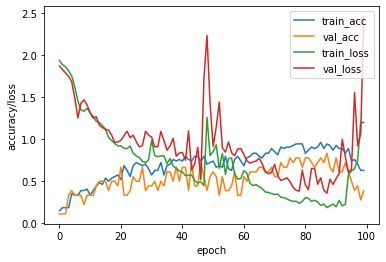

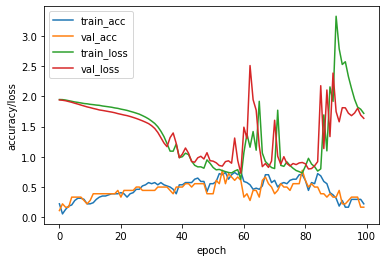

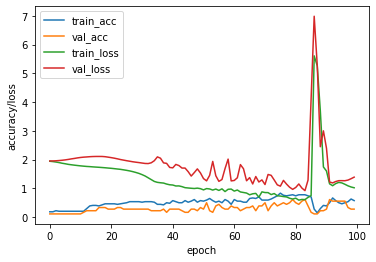

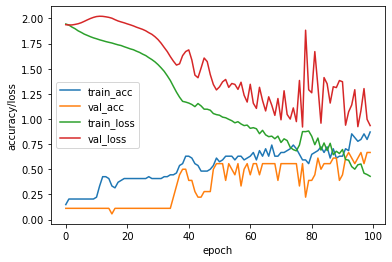

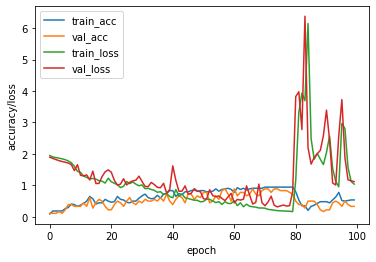

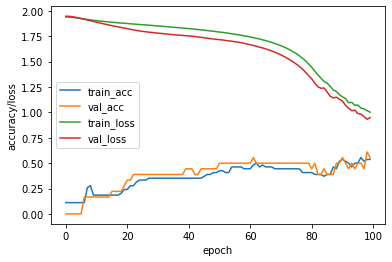

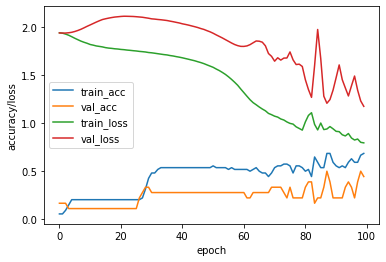

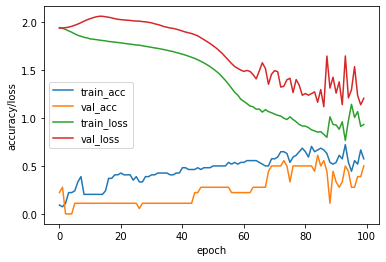

In [13]:
for history in histories5:
    pp.plot_hist(history)